<h1 align="center"><font size="7">CAPSTONE PROJECT</font></h1>
<h1 align="center"><font size="5.5">PREDICT: SEVERITY OF COLLISION</font></h1>
<h3 align="center"><font size="3">By Nguyễn Tường Quang</font></h3>
<h3 align="center"><font size="3">September, 2020</font></h3>

# Table of Contents  
* [Introduction: Business Problem](#introduction) 
* [Analytic Approach](#Analytic)
* [Data](#Data)  
* [Data Analysis: Exploring and Preprocessing](#Analysis)  
* [Modeling](#Modeling)  
* [Evaluation Model](#Evaluation)  
* [Discussion](#discussion)  
* [Conclusion](#conclusion)

# Introduction: Business Problem<a name="introduction"></a>  
Traffic accident is something no one wants, but also a part of modern life. Traffic accidents do not happen naturally, but have causes. If an accident can be predicted, from the initially assumed causes, we can adjust everything related to reduce the accident. Specifically, this report will be targeted to stakeholders to reduce crashes.  
This is the goal of this project.  
Under the aspect of data science, we should must collect data related to vehicle accidents in history, as much as possible, and then analyze the data to build a suitable predictive model.  
If it is possible to build a good predictive model, that is, it is possible to establish a link between the input causes and the severity of the accident, we will be able to predict the accidents in future.

# Analytic Approach<a name="Analytic"></a> 
With the goal is to forecast the severity of collisions, this is clearly the classification of damage caused by a traffic accident.  
The levels of damage can be classified into several levels, such as: property damage, human injured, or death. In this project, we only divided into two levels: level 1- only property damage that does not injure (prop damage), level 2- that hurts people (injury).  
From that purpose, we can choose familiar classification algorithms such as: Naive Bayes, Logistic regression, Decision tree, K nearest neighbors, super vector machine, ...  
But for the purpose of only dividing into 2 levels, the binary type, we prefer to choose: Logistic regression and Decision tree.

# Data<a name="Data"></a> 
### Data requirements  
The prerequisite must be real data, recording many aspects related to accidents, such as location, date and time, road conditions, weather conditions, lighting conditions, number of people involved in an accident, number of vehicles and type of vehicle crashed ... And, ultimately and most importantly, the consequences of the accident. The aftermath of an accident must be fully recorded on the damage to property as well as human life. This is the target of classification in this project.  
The next condition is that the data must be large enough, preferably recorded for many consecutive years in the same region or city, country ...  
The third condition is that data must be recorded in a structured and clear way.
### Data sourses  
There are many datasets that meet the above requirements. For this project, we used the City of Seattle dataset, recorded from 2004 to 4/2020. This dataset is shared by IBM Data Science course.
### Data descriptions  
The dataset consists of nearly two hundred thousand rows, with 38 columns. In which, the first column is about the severity of the collision, which is the target for classification in the model. Consists of two serious levels: 1-prop damage and 2-injury.  
The remaining 37 columns, in addition to the separate record columns of the state, are the remaining data that can be used as inputs to build the model. These columns are entirely categorical variables. Include:
- Type of collision  
- Total number of people involved in a collision  
- Number of pedestrians involved in a collision  
- Number of cyclists involved in a collision  
- Number of vehicles involved in a collision  
- Traffic configuration where collision occurred (junctiontype)  
- Weather conditions at the time of the collision  
- Road conditions at the time of the collision  
- Light conditions at the time of the collision  
- The date and time of the collision  

Which features to choose as input for the predictive model will depend on the relationship between that feature and the target (i.e the severity of the collision). This will be achieved after exploring data analysis and preprocessing step.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Data Analysis: Exploring and Preprocessing<a name="Analysis"></a>  

In [2]:
df = pd.read_csv('D:/DATA/IBM/Capstone_Project/Data-Collisions.csv',low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

## 1. Severity of collisions (target)

In [4]:
df.SEVERITYCODE.value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

### Discussion  
About 70% of collisions are level 1: 'prop damage', and about 30% are level 2: 'injury'.

## 2. Number of persons,  pedestrians,  bicycles and vehicles involved in the collision

In [5]:
# Number of persons involved:
df.groupby('SEVERITYCODE')['PERSONCOUNT'].mean()

SEVERITYCODE
1    2.329348
2    2.714357
Name: PERSONCOUNT, dtype: float64

In [6]:
# Number of pedestrians involved:
df.groupby('SEVERITYCODE')['PEDCOUNT'].mean()

SEVERITYCODE
1    0.005268
2    0.111896
Name: PEDCOUNT, dtype: float64

In [7]:
# Number of bicycles involved:
df.groupby('SEVERITYCODE')['PEDCYLCOUNT'].mean()

SEVERITYCODE
1    0.004975
2    0.083316
Name: PEDCYLCOUNT, dtype: float64

In [8]:
# Number of vehicles involved:
df.groupby('SEVERITYCODE')['VEHCOUNT'].mean()

SEVERITYCODE
1    1.943312
2    1.867928
Name: VEHCOUNT, dtype: float64

### Discussion  
Number of pedestrians and bicycles are too small to use for predicting.

## 3. Relationship between type of collision with severity of collision

In [9]:
df.COLLISIONTYPE.value_counts(normalize=True)

Parked Car    0.252871
Angles        0.182717
Rear Ended    0.179639
Other         0.124904
Sideswipe     0.098061
Left Turn     0.072209
Pedestrian    0.034821
Cycles        0.028535
Right Turn    0.015577
Head On       0.010666
Name: COLLISIONTYPE, dtype: float64

In [10]:
col = df.groupby(['COLLISIONTYPE','SEVERITYCODE']).size().unstack().sort_values(by=1,ascending=False)
col

SEVERITYCODE,1,2
COLLISIONTYPE,,
Parked Car,45325,2662
Angles,21050,13624
Rear Ended,19419,14671
Other,17591,6112
Sideswipe,16103,2506
Left Turn,8292,5411
Right Turn,2347,609
Head On,1152,872
Pedestrian,672,5936


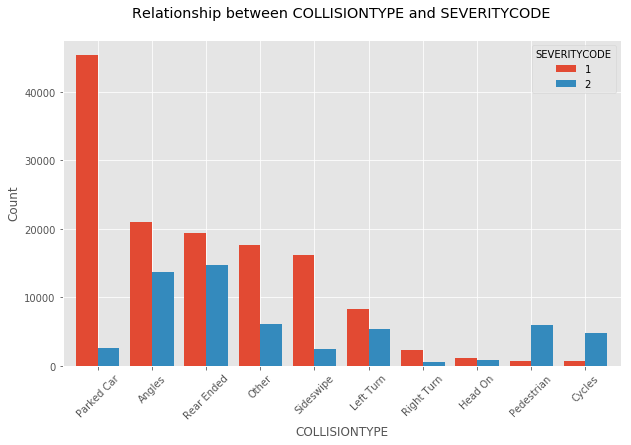

In [11]:
col.plot(kind='bar',figsize=(10,6),width=0.8)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Relationship between COLLISIONTYPE and SEVERITYCODE',y=1.05)
plt.show()

### Discussion
Looking at the plot we can see the collisions that occur most with parked vehicles, followed by at corners and hitting the back of the vehicle. Parking arrangements are also a problem in modern cities.

## 4. Relationship between JUNCTIONTYPE with severity of collision

In [12]:
df.JUNCTIONTYPE.value_counts(normalize=True)

Mid-Block (not related to intersection)              0.476787
At Intersection (intersection related)               0.333486
Mid-Block (but intersection related)                 0.121002
Driveway Junction                                    0.056657
At Intersection (but not related to intersection)    0.011139
Ramp Junction                                        0.000881
Unknown                                              0.000048
Name: JUNCTIONTYPE, dtype: float64

In [13]:
junc = df.groupby(['JUNCTIONTYPE','SEVERITYCODE']).size().unstack().sort_values(by=1,ascending=False)
junc

SEVERITYCODE,1,2
JUNCTIONTYPE,,
Mid-Block (not related to intersection),70396,19404
At Intersection (intersection related),35636,27174
Mid-Block (but intersection related),15493,7297
Driveway Junction,7437,3234
At Intersection (but not related to intersection),1475,623
Ramp Junction,112,54
Unknown,7,2


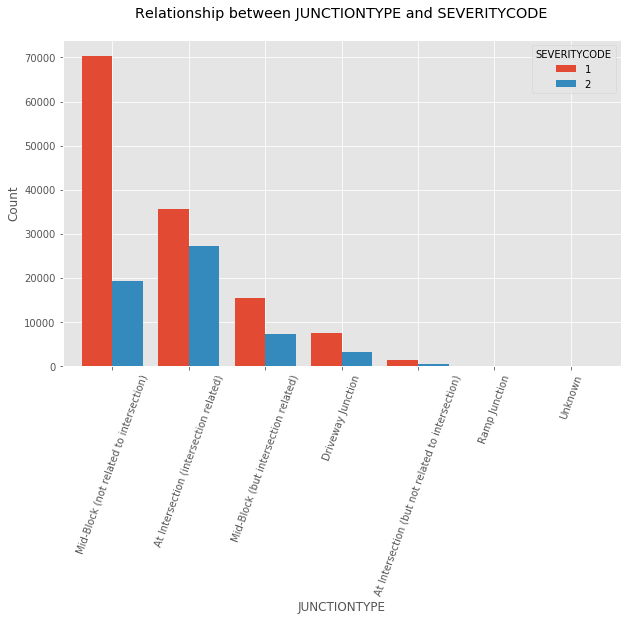

In [14]:
junc.plot(kind='bar',figsize=(10,6),width=0.8)
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.title('Relationship between JUNCTIONTYPE and SEVERITYCODE',y=1.05)
plt.show()

### Discussion 
Looking at the plot we can see that the traffic configuration greatly affects the collisions. Building blocks, intersections, all have the potential to contribute to collisions.

## 5. Relationship between WEATHER with severity of collision

In [15]:
df.WEATHER.value_counts(normalize=True)

Clear                       0.586180
Raining                     0.174823
Overcast                    0.146177
Unknown                     0.079597
Snowing                     0.004784
Other                       0.004388
Fog/Smog/Smoke              0.003001
Sleet/Hail/Freezing Rain    0.000596
Blowing Sand/Dirt           0.000295
Severe Crosswind            0.000132
Partly Cloudy               0.000026
Name: WEATHER, dtype: float64

In [16]:
wea = df.groupby(['WEATHER','SEVERITYCODE']).size().unstack().sort_values(by=1,ascending=False)
wea

SEVERITYCODE,1,2
WEATHER,,
Clear,75295,35840
Raining,21969,11176
Overcast,18969,8745
Unknown,14275,816
Snowing,736,171
Other,716,116
Fog/Smog/Smoke,382,187
Sleet/Hail/Freezing Rain,85,28
Blowing Sand/Dirt,41,15


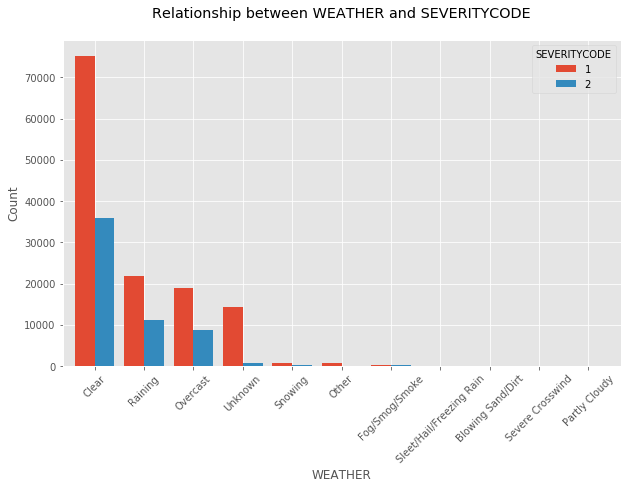

In [17]:
wea.plot(kind='bar',figsize=(10,6),width=0.8)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Relationship between WEATHER and SEVERITYCODE',y=1.05)
plt.show()

### Discussion 
Amazingly, the clear weather causes the most accidents, three times more than it rains. While it is snowing or foggy, it causes very few traffic accidents.

## 6. Relationship between the condition of the road with severity of collision

In [18]:
df.ROADCOND.value_counts(normalize=True)

Dry               0.656487
Wet               0.250310
Unknown           0.079500
Ice               0.006375
Snow/Slush        0.005294
Other             0.000696
Standing Water    0.000606
Sand/Mud/Dirt     0.000395
Oil               0.000337
Name: ROADCOND, dtype: float64

In [19]:
roa = df.groupby(['ROADCOND','SEVERITYCODE']).size().unstack().sort_values(by=1,ascending=False)
roa

SEVERITYCODE,1,2
ROADCOND,,
Dry,84446,40064
Wet,31719,15755
Unknown,14329,749
Ice,936,273
Snow/Slush,837,167
Other,89,43
Standing Water,85,30
Sand/Mud/Dirt,52,23
Oil,40,24


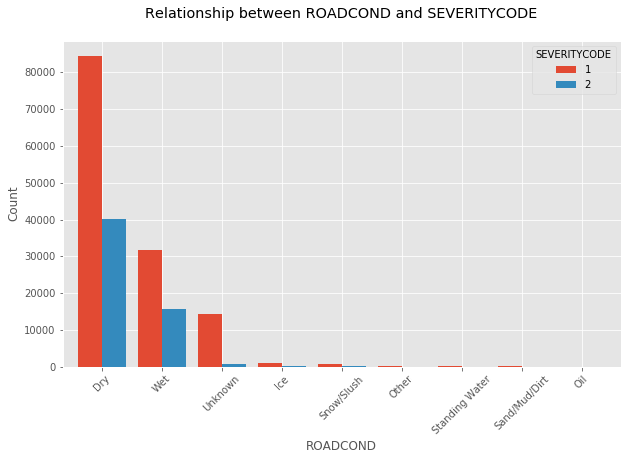

In [20]:
roa.plot(kind='bar',figsize=(10,6),width=0.8)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Relationship between ROADCOND and SEVERITYCODE',y=1.05)
plt.show()

### Discussion  
Another surprise is that dry roads cause the most traffic accidents, almost 3 times when wet roads. While the road is icy or snowy, it causes very little accidents.

## 7. Relationship between the light conditions with severity of collision

In [21]:
df.LIGHTCOND.value_counts(normalize=True)

Daylight                    0.612850
Dark - Street Lights On     0.255970
Unknown                     0.071096
Dusk                        0.031145
Dawn                        0.013203
Dark - No Street Lights     0.008111
Dark - Street Lights Off    0.006327
Other                       0.001240
Dark - Unknown Lighting     0.000058
Name: LIGHTCOND, dtype: float64

In [22]:
light = df.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack().sort_values(by=1,ascending=False)
light

SEVERITYCODE,1,2
LIGHTCOND,,
Daylight,77593,38544
Dark - Street Lights On,34032,14475
Unknown,12868,605
Dusk,3958,1944
Dawn,1678,824
Dark - No Street Lights,1203,334
Dark - Street Lights Off,883,316
Other,183,52
Dark - Unknown Lighting,7,4


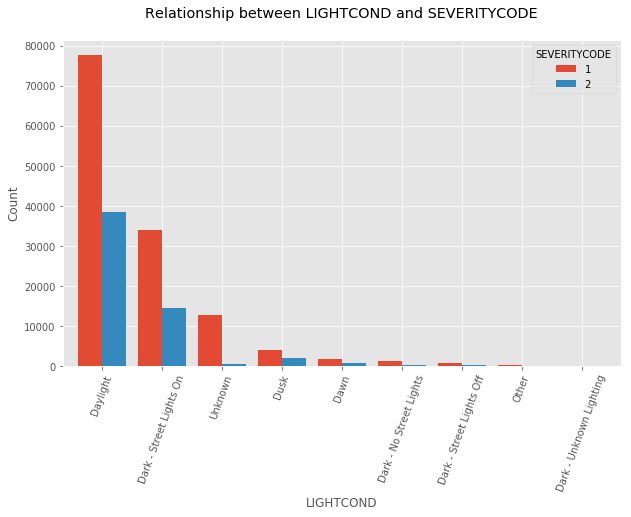

In [23]:
light.plot(kind='bar',figsize=(10,6),width=0.8)
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.title('Relationship between LIGHTCOND and SEVERITYCODE',y=1.05)
plt.show()

### Discussion 
Most accidents happen during the day, twice as much at night. This is probably related to daytime traffic rather than night.

## 8. The date in collisions, related to the severity

In [24]:
# Transform to datetime:
df.INCDATE = pd.to_datetime(df.INCDATE)

In [25]:
# Create column 'dayofweek':
df['dayofweek'] = df.INCDATE.dt.dayofweek
df.dayofweek = df['dayofweek'].replace([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
df.dayofweek.value_counts(normalize=True)

Fri     0.166089
Thur    0.150632
Wed     0.147827
Tue     0.146687
Sat     0.140692
Mon     0.135294
Sun     0.112779
Name: dayofweek, dtype: float64

In [26]:
dayofweek = df.groupby('dayofweek')['SEVERITYCODE'].count().sort_values(ascending=False)
dayofweek

dayofweek
Fri     32333
Thur    29324
Wed     28778
Tue     28556
Sat     27389
Mon     26338
Sun     21955
Name: SEVERITYCODE, dtype: int64

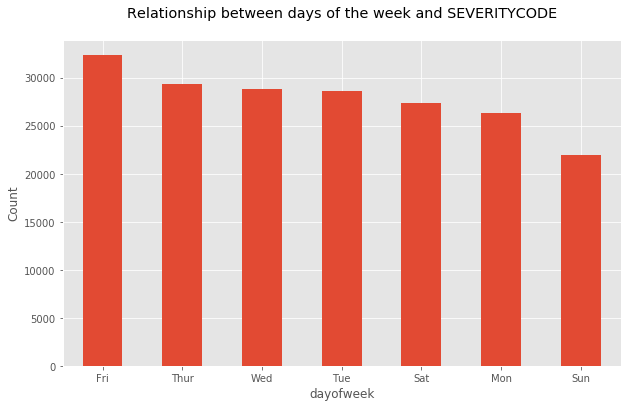

In [27]:
dayofweek.plot(kind='bar',figsize=(10,6))
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Relationship between days of the week and SEVERITYCODE',y=1.05)
plt.show()

### Discussion  
Collisions occurred the most on Friday and at least on Sunday.

## 9. The time problem in the dataset
The time data of the collisions are very important in building predictive models. This dataset has a timed column but is incomplete. Thus, to use time as input, we have to filter and remove rows that have no time. But this can cause a lot of data loss, affecting the prediction results.  
Below we will explore the collisions year by year in the case of keeping the raw data and only the timed rows.

In [28]:
dx = df.copy()

In [29]:
rowx = dx.INCDTTM.apply(lambda x: len(x)>10)
dx = dx[rowx == True]

In [30]:
dx.INCDTTM[:5]

0      3/27/2013 2:54:00 PM
1     12/20/2006 6:55:00 PM
2    11/18/2004 10:20:00 AM
3      3/29/2013 9:26:00 AM
4      1/28/2004 8:04:00 AM
Name: INCDTTM, dtype: object

In [31]:
dx.INCDTTM = pd.to_datetime(dx.INCDTTM)

In [32]:
year = df.groupby(df.INCDATE.dt.year)['SEVERITYCODE'].count()
y = dx.groupby(dx.INCDTTM.dt.year)['SEVERITYCODE'].count()

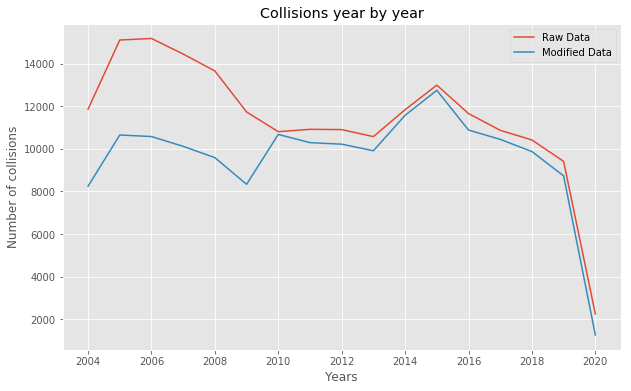

In [33]:
ax = year.plot(figsize=(10,6))
y.plot(figsize = (10,6),ax=ax)
plt.ylabel('Number of collisions')
plt.xticks(rotation=0)
plt.xlabel('Years')
plt.legend(['Raw Data','Modified Data'])
plt.title('Collisions year by year')
plt.show()

### Discussion  
Look at the plot from 2004 to 2019:  
The red line is the original data, tends to decrease year by year. While the blue line, the timed data, tends to flat. It means that filtering and removing data have falsified reality.  
### Conclusion  
Because of this bias, we decided not to use the hour data as an input to build a predictive model.

## 10. Select features for the predicting model

In [34]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'dayofweek'],
      dtype='object')

In [35]:
features = df[['SEVERITYCODE','PERSONCOUNT','VEHCOUNT','COLLISIONTYPE','JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND','dayofweek']]
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   194673 non-null  int64 
 1   PERSONCOUNT    194673 non-null  int64 
 2   VEHCOUNT       194673 non-null  int64 
 3   COLLISIONTYPE  189769 non-null  object
 4   JUNCTIONTYPE   188344 non-null  object
 5   WEATHER        189592 non-null  object
 6   ROADCOND       189661 non-null  object
 7   LIGHTCOND      189503 non-null  object
 8   dayofweek      194673 non-null  object
dtypes: int64(3), object(6)
memory usage: 8.9+ MB


In [36]:
# Remove missing values:
features = features.dropna().reset_index(drop=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183177 entries, 0 to 183176
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   183177 non-null  int64 
 1   PERSONCOUNT    183177 non-null  int64 
 2   VEHCOUNT       183177 non-null  int64 
 3   COLLISIONTYPE  183177 non-null  object
 4   JUNCTIONTYPE   183177 non-null  object
 5   WEATHER        183177 non-null  object
 6   ROADCOND       183177 non-null  object
 7   LIGHTCOND      183177 non-null  object
 8   dayofweek      183177 non-null  object
dtypes: int64(3), object(6)
memory usage: 8.4+ MB


## 11. One - Hot Encoding

In [37]:
features = features.join(pd.get_dummies(features.COLLISIONTYPE))

In [38]:
features = features.drop(columns='Other')

In [39]:
features = features.join(pd.get_dummies(features.JUNCTIONTYPE))

In [40]:
features = features.drop(columns=['Ramp Junction','Unknown'])

In [41]:
features = features.join(pd.get_dummies(features.WEATHER))

In [42]:
features = features.drop(columns=['Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])

In [43]:
features = features.join(pd.get_dummies(features.ROADCOND))

In [44]:
features = features.drop(columns=['Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water','Sand/Mud/Dirt', 'Oil'])

In [45]:
features = features.join(pd.get_dummies(features.LIGHTCOND))

In [46]:
features = features.drop(columns=['Unknown','Dark - No Street Lights', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'])

In [47]:
features = features.join(pd.get_dummies(features.dayofweek))

In [48]:
features = features.drop(columns=['COLLISIONTYPE','JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND','dayofweek'])

In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183177 entries, 0 to 183176
Data columns (total 33 columns):
 #   Column                                             Non-Null Count   Dtype
---  ------                                             --------------   -----
 0   SEVERITYCODE                                       183177 non-null  int64
 1   PERSONCOUNT                                        183177 non-null  int64
 2   VEHCOUNT                                           183177 non-null  int64
 3   Angles                                             183177 non-null  uint8
 4   Cycles                                             183177 non-null  uint8
 5   Head On                                            183177 non-null  uint8
 6   Left Turn                                          183177 non-null  uint8
 7   Parked Car                                         183177 non-null  uint8
 8   Pedestrian                                         183177 non-null  uint8
 9   Rear Ended     

## 12. Normalize Data

In [50]:
X = features[features.columns[1:]]
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:2]

array([[-0.34712665,  0.04987854,  2.07726367, -0.1737018 , -0.10496003,
        -0.28365611, -0.5561435 , -0.19203732, -0.47467188, -0.12749695,
        -0.33327571, -0.10656975,  1.41131754, -0.24684013, -0.37281423,
        -0.94955561, -1.21437063,  2.39456747, -0.46591244, -1.41668385,
         1.70833025, -0.59244607, -0.11650401,  0.77935479, -0.18050564,
        -0.44594296, -0.39392054, -0.40673509, -0.3580034 , -0.42084325,
        -0.41403581,  2.4046985 ],
       [-0.34712665,  0.04987854, -0.48140254, -0.1737018 , -0.10496003,
        -0.28365611, -0.5561435 , -0.19203732, -0.47467188, -0.12749695,
         3.00051874, -0.10656975, -0.70855776, -0.24684013, -0.37281423,
         1.05312421, -1.21437063, -0.41761195,  2.14632603, -1.41668385,
         1.70833025,  1.68791733, -0.11650401, -1.28311266, -0.18050564,
        -0.44594296, -0.39392054, -0.40673509, -0.3580034 , -0.42084325,
        -0.41403581,  2.4046985 ]])

In [51]:
y = features.SEVERITYCODE.values
y

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

# Modeling<a name="Modeling"></a>   
For all variables are categorical and the target is only divided into two classes, binary type, the choice of classification algorithms must conform to these characteristics of the data.
The top two candidates are: Logistic Regression and Decision Tree.

## Train/Test dataset

In [52]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size=0.25, random_state=0)
print ('Train set:', Xtrain.shape,  ytrain.shape)
print ('Test set:', Xtest.shape,  ytest.shape)

Train set: (137382, 32) (137382,)
Test set: (45795, 32) (45795,)


## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
dtc.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
yhat_dtc = dtc.predict(Xtest)

In [66]:
# Accuracy:
len(yhat_dtc[yhat_dtc==ytest])/len(ytest)

0.7487716999672454

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

solver = ['newton-cg','lbfgs','liblinear','sag','saga']
LR = LogisticRegression(C=0.01, solver='saga').fit(Xtrain,ytrain)
yhat_LR = LR.predict(Xtest)
yhat_proba = LR.predict_proba(Xtest)

In [57]:
# Accuracy:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,yhat_LR)

0.7475488590457473

# Evaluation Model<a name="Evaluation"></a> 

In [58]:
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [67]:
jac=[]
f1=[]
for i in [yhat_dtc,yhat_LR]:
    jac.append(jaccard_similarity_score(ytest,i))
    f1.append(f1_score(ytest,i,average='weighted'))
log = log_loss(ytest,yhat_proba)
print('jaccard: ',jac)
print('f1-score: ',f1)
print('logloss: ',log)

jaccard:  [0.7487716999672454, 0.7475488590457473]
f1-score:  [0.7095709822822823, 0.7061199203531622]
logloss:  0.49570602121113505


In [68]:
# Evaluation Report:
report = pd.DataFrame({'Algorithm':['Decision Tree','LogisticRegression'],'Jaccard':jac,'F1-score':f1,'LogLoss':['NA',log]},index=range(2))
report

,Algorithm,Jaccard,F1-score,LogLoss
0,Decision Tree,0.748772,0.709571,NA
1,LogisticRegression,0.747549,0.706120,0.495706


### Evaluation by confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

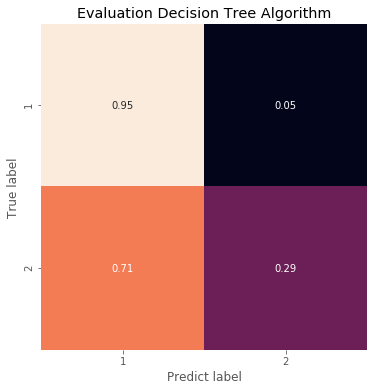

In [69]:
# Decision Tree
mat = confusion_matrix(ytest, yhat_dtc)
mat = mat/mat.sum(1)[:,np.newaxis]
plt.figure(figsize=(6,6))
ax = sns.heatmap(mat, square=True, annot=True, fmt='.2f', cbar=False)
ax.set_xticklabels([1,2])
ax.set_yticklabels([1,2])
plt.xlabel('Predict label')
plt.ylabel('True label');
plt.title('Evaluation Decision Tree Algorithm')
plt.show()

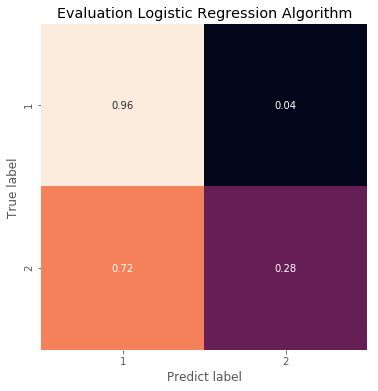

In [63]:
# Logistic Regression
mat = confusion_matrix(ytest, yhat_LR)
mat = mat/mat.sum(1)[:,np.newaxis]
plt.figure(figsize=(6,6))
ax = sns.heatmap(mat, square=True, annot=True, fmt='.2f', cbar=False)
ax.set_xticklabels([1,2])
ax.set_yticklabels([1,2])
plt.xlabel('Predict label')
plt.ylabel('True label');
plt.title('Evaluation Logistic Regression Algorithm')
plt.show()

#### Discussion based on confusion matrix results:  
Both algorithms (Decision Tree and Logistic Regression) predicted very well at class-1 (i.e prop damage), correct up to 95% and 96%. But both algorithms predicted very poorly with class-2 (injury), only correct 29% and 28%.
This shows that the class-2 inputs, in addition to being much less than class-1, show little distinct distinguishing features between the two classes.

# Discussion<a name="discussion"></a> 
With an overall accuracy of nearly 75%, however, the difference in accuracy in the two classes is very high.  
With class 1 (prop damage), both methods are very high results, up to 95% and 96%. However, the opposite results in class 2 (injury), the results predicted by both methods are very low (only 29% and 28%).  
This restriction is due to the input data. Presumably, the input data lacked the features by which traffic accident severity could be more clearly distinguished. For example, the speed of a vehicle at the time of a collision. This data is available in the traffic monitoring system but has not been updated. Obviously, the higher the speed, the higher the risk of human injury.  

# Conclusion<a name="conclusion"></a> 
With the above results, it can be seen as a source of reference for stakeholders. However, in future, if the input data can be improved, the accuracy will definitely be higher. And of course, forecasts are also more useful.